<a href="https://colab.research.google.com/github/ayberkcorp/cap4630-artificial_intelligence/blob/master/HW_2/Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Batch Gradient Descent

### Imports

In [0]:
from mpl_toolkits import mplot3d
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Generate random data

In [0]:
# generate m random points (x1, x2, y)

m = 1000
w1, w2 = 1, 2
b = 3
x1, x2 = 2 * np.random.rand(m, 1), 2 * np.random.rand(m, 1)
y = w1 * x1 + w2 * x2 + b + np.random.rand(m, 1)

### Plot random data

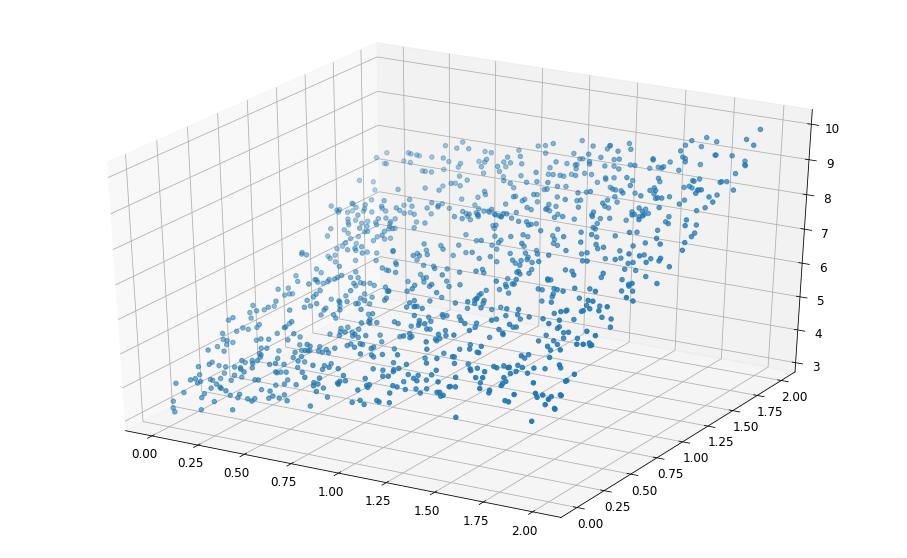

In [87]:
plt.figure(figsize=(16, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, y);

### Combine bias and weights

In [0]:
# add x0 = 1
X_b = np.column_stack([np.ones((m, 1)), x1, x2])

### Linear regression using mini-batch gradient descent

A few training examples are selected to compute the gradient.

In [0]:
# number of epochs
epochs = 20
# learning rate
lr = 0.01
# initial random weight
np.random.seed(42)
weights = np.random.randn(3, 1)
# batch size
batch_size = 40

# mini-batch gradient descent
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weights) - yi)
        weights = weights - lr * gradient

### Plot final prediction

Displaying the final prediction of the model after tuning the parameters with gradient descent.

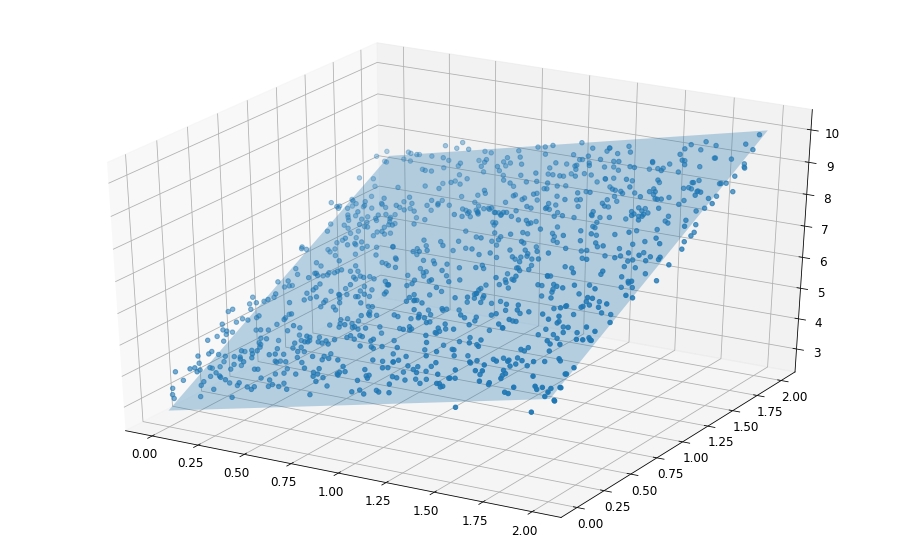

In [90]:
plt.figure(figsize=(16, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, y)

x = np.linspace(0, 2, 2)
y = np.linspace(0, 2, 2)

x_1, y_1 = np.meshgrid(x, y)
y_prediction = weights[1] * x_1 + weights[2] * y_1 + weights[0]
ax.plot_surface(x_1, y_1, y_prediction, alpha=0.3);

### Sources

https://colab.research.google.com/drive/1qBxfTPoNcSFvpwu1NDl1V6cHEqL3aQl-

https://colab.research.google.com/drive/1btvbObh-nZ4MSC7QkjpS3RGpefN_msth